In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Make dataset**

In [2]:
# Loading the datasets
#HPI = pd.read_csv("USSTHPI.csv") # Quarterly HPI data
HPI_PO = pd.read_csv("HPI_Purchase_only_yoy_change.csv") # HPI Purchase Only data
EHS = pd.read_excel("Existing Home Sales.xlsx") # Existing Home Sales data, Chris supplied
StockQt = pd.read_excel("HousingStockWorksheet.xlsx", sheet_name = "Stock_Quarterly") # Housing Stock data, Chris supplied

In [3]:
# Just chaging the column name and cleaning the data
HPI_PO.DATE = pd.to_datetime(HPI_PO.DATE)
new_name = {'HPIPONM226S_PC1' : "YoY_HPI"}
HPI_PO.rename(columns=new_name, inplace= True)
HPI_PO.drop(HPI_PO.tail(1).index, inplace= True)
HPI_PO.YoY_HPI = HPI_PO.YoY_HPI.astype(float)

In [4]:
StockQt.rename(columns={"Unnamed: 15" : "col 15", "Unnamed: 16" : "Eff_HS_US"}, inplace=True)
StockQt.drop(columns=["col 15"], inplace= True)
StockQt.dropna(subset=["Eff_HS_US"],inplace = True)
Quarters = StockQt.Quarter.values
Quarter_to_Date = {"Q1" : "-01-01",
                  "Q2" : "-04-01",
                  "Q3" : "-07-01",
                  "Q4" : "-10-01"}
Dates = []
for i in Quarters:
    y = i.split()[0]
    y+= Quarter_to_Date[i.split()[1]]
    Dates.append(y)
StockQt.Quarter = Dates

In [5]:
EHS.EOM = pd.to_datetime(EHS.EOM)
EHS.rename(columns= {"EOM" : "DATE"}, inplace = True)
EHS.dropna(subset=["Existing Home Sales"], inplace=True)

In [6]:
EHS["DATE"] = EHS.DATE.dt.to_period('Q')
EHS_Q = pd.DataFrame(EHS.groupby("DATE").mean())
EHS_Q.reset_index(inplace= True)
EHS_Q.drop(EHS_Q.tail(1).index,inplace=True)

In [7]:
EHS_Q["House_Stock"] = StockQt.Eff_HS_US.values

In [8]:
EHS_Q["Implied_Turnover"] = (EHS_Q["Existing Home Sales"]/(EHS_Q.House_Stock/1000))*100

In [9]:
Turnover = list(EHS_Q.Implied_Turnover.values)
Turnover = [np.nan]*(HPI_PO.shape[0]-len(Turnover))+Turnover
HPI_PO["Implied_Turnover"] = Turnover

In [10]:
HPI_PO

,DATE,YoY_HPI,Implied_Turnover
0,1992-01-01,2.35603,NaN
1,1992-04-01,2.14440,NaN
2,1992-07-01,2.77548,NaN
3,1992-10-01,2.74108,NaN
4,1993-01-01,1.53561,NaN
...,...,...,...
116,2021-01-01,13.08681,6.684530
117,2021-04-01,17.81826,6.321918
118,2021-07-01,18.60512,6.440745
119,2021-10-01,17.70045,6.539117


In [11]:
HPI_PO["YoY_HPI_MA_6"] = HPI_PO.YoY_HPI.rolling(6).mean()

In [12]:
for i in range(6):
    HPI_PO[f'YOY_HPI_Lag_{i+1}']= HPI_PO['YoY_HPI'].shift(i+1)

In [13]:
HPI_PO

,DATE,YoY_HPI,Implied_Turnover,YoY_HPI_MA_6,YOY_HPI_Lag_1,YOY_HPI_Lag_2,YOY_HPI_Lag_3,YOY_HPI_Lag_4,YOY_HPI_Lag_5,YOY_HPI_Lag_6
0,1992-01-01,2.35603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992-04-01,2.14440,NaN,NaN,2.35603,NaN,NaN,NaN,NaN,NaN
2,1992-07-01,2.77548,NaN,NaN,2.14440,2.35603,NaN,NaN,NaN,NaN
3,1992-10-01,2.74108,NaN,NaN,2.77548,2.14440,2.35603,NaN,NaN,NaN
4,1993-01-01,1.53561,NaN,NaN,2.74108,2.77548,2.14440,2.35603,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
116,2021-01-01,13.08681,6.684530,8.340382,11.17118,8.25959,5.76118,6.23889,5.52464,4.99680
117,2021-04-01,17.81826,6.321918,10.389318,13.08681,11.17118,8.25959,5.76118,6.23889,5.52464
118,2021-07-01,18.60512,6.440745,12.450357,17.81826,13.08681,11.17118,8.25959,5.76118,6.23889
119,2021-10-01,17.70045,6.539117,14.440235,18.60512,17.81826,13.08681,11.17118,8.25959,5.76118


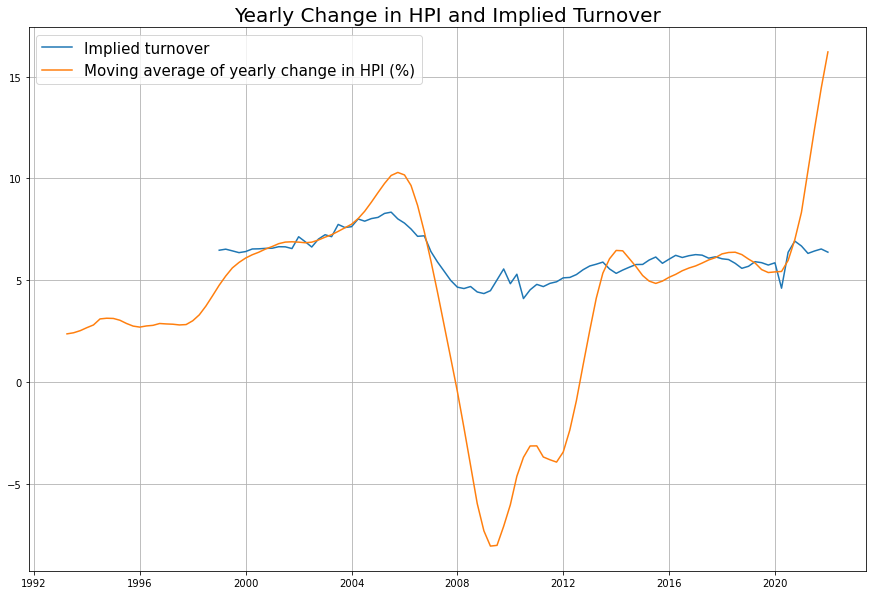

In [14]:
plt.figure(figsize=(15,10))
#plt.plot(HPI_PO.DATE, HPI_PO.YoY.values, label = "Yearly change in HPI (%)")
plt.plot(HPI_PO.DATE, HPI_PO.Implied_Turnover.values, label = "Implied turnover")
plt.plot(HPI_PO.DATE, HPI_PO.YoY_HPI_MA_6, label = "Moving average of yearly change in HPI (%)")
plt.legend(fontsize = 15)
plt.grid()
plt.title("Yearly Change in HPI and Implied Turnover", size = 20);

In [15]:
HPI_df = HPI_PO.dropna().reset_index(drop=True)

In [16]:
HPI_df

,DATE,YoY_HPI,Implied_Turnover,YoY_HPI_MA_6,YOY_HPI_Lag_1,YOY_HPI_Lag_2,YOY_HPI_Lag_3,YOY_HPI_Lag_4,YOY_HPI_Lag_5,YOY_HPI_Lag_6
0,1999-01-01,5.93694,6.477936,4.762640,5.70589,5.16140,4.52891,3.91376,3.32894,2.80875
1,1999-04-01,6.02527,6.529750,5.212028,5.93694,5.70589,5.16140,4.52891,3.91376,3.32894
2,1999-07-01,6.29097,6.447134,5.608230,6.02527,5.93694,5.70589,5.16140,4.52891,3.91376
3,1999-10-01,6.14804,6.359195,5.878085,6.29097,6.02527,5.93694,5.70589,5.16140,4.52891
4,2000-01-01,6.46462,6.412796,6.095288,6.14804,6.29097,6.02527,5.93694,5.70589,5.16140
...,...,...,...,...,...,...,...,...,...,...
88,2021-01-01,13.08681,6.684530,8.340382,11.17118,8.25959,5.76118,6.23889,5.52464,4.99680
89,2021-04-01,17.81826,6.321918,10.389318,13.08681,11.17118,8.25959,5.76118,6.23889,5.52464
90,2021-07-01,18.60512,6.440745,12.450357,17.81826,13.08681,11.17118,8.25959,5.76118,6.23889
91,2021-10-01,17.70045,6.539117,14.440235,18.60512,17.81826,13.08681,11.17118,8.25959,5.76118


In [17]:
HCAI = pd.read_csv("HCAI_WM.csv")

In [18]:
HCAI.rename(columns = {'Total\nRisk':'Total_Risk', 'Borrower\nRisk':'Borrower_Risk', 'Product\nRisk':'Product_Risk'}, inplace = True)

In [19]:
HCAI = HCAI[4:].reset_index(drop=True)

In [20]:
num_col = ['Total_Risk', 'Borrower_Risk', 'Product_Risk']
for col in num_col:
    HCAI[col] = HCAI[col].astype('float64')

In [21]:
HCAI

,Year,Quarter,Total_Risk,Borrower_Risk,Product_Risk
0,1999,1,11.236,8.836,2.400
1,1999,2,11.790,9.040,2.750
2,1999,3,13.209,9.471,3.737
3,1999,4,14.332,10.160,4.172
4,2000,1,14.764,10.372,4.393
...,...,...,...,...,...
86,2020,3,4.989,4.986,0.003
87,2020,4,5.082,5.078,0.003
88,2021,1,5.125,5.121,0.004
89,2021,2,5.145,5.138,0.007


In [22]:
HCAI_index = HCAI.index.to_list()
HCAI_Y = HCAI.Year.values
HCAI_Q = HCAI.Quarter.values
Quarter_to_Date = {1 : "-01-01", 2 : "-04-01",  3 : "-07-01", 4 : "-10-01"}
Dates = []
for i in HCAI_index:
    date = str(HCAI_Y[i])+Quarter_to_Date[HCAI_Q[i]]
    Dates.append(date)
HCAI['DATE'] = pd.to_datetime(Dates)

In [23]:
HCAI.drop(['Year', 'Quarter'], axis=1, inplace=True)

In [24]:
HCAI

,Total_Risk,Borrower_Risk,Product_Risk,DATE
0,11.236,8.836,2.400,1999-01-01
1,11.790,9.040,2.750,1999-04-01
2,13.209,9.471,3.737,1999-07-01
3,14.332,10.160,4.172,1999-10-01
4,14.764,10.372,4.393,2000-01-01
...,...,...,...,...
86,4.989,4.986,0.003,2020-07-01
87,5.082,5.078,0.003,2020-10-01
88,5.125,5.121,0.004,2021-01-01
89,5.145,5.138,0.007,2021-04-01


In [25]:
df_hpi_hcai=HPI_df.merge(HCAI, how='left')

In [26]:
df_hpi_hcai.drop(['Borrower_Risk', 'Product_Risk'], axis=1, inplace=True)

In [27]:
df_hpi_hcai.rename(columns={'Total_Risk':'HCAI'}, inplace = True)

In [28]:
df_hpi_hcai.fillna(method="ffill", inplace=True)

# **2. Train models**

Let us test each lag features.

In [29]:
df_hpi_hcai.columns

Index(['DATE', 'YoY_HPI', 'Implied_Turnover', 'YoY_HPI_MA_6', 'YOY_HPI_Lag_1',
       'YOY_HPI_Lag_2', 'YOY_HPI_Lag_3', 'YOY_HPI_Lag_4', 'YOY_HPI_Lag_5',
       'YOY_HPI_Lag_6', 'HCAI'],
      dtype='object')

In [30]:
drop_fe = ['DATE', 'Implied_Turnover']
features = [col for col in list(df_hpi_hcai.columns) if col not in drop_fe]
features

['YoY_HPI',
 'YoY_HPI_MA_6',
 'YOY_HPI_Lag_1',
 'YOY_HPI_Lag_2',
 'YOY_HPI_Lag_3',
 'YOY_HPI_Lag_4',
 'YOY_HPI_Lag_5',
 'YOY_HPI_Lag_6',
 'HCAI']

In [31]:
df_hpi_hcai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              93 non-null     datetime64[ns]
 1   YoY_HPI           93 non-null     float64       
 2   Implied_Turnover  93 non-null     float64       
 3   YoY_HPI_MA_6      93 non-null     float64       
 4   YOY_HPI_Lag_1     93 non-null     float64       
 5   YOY_HPI_Lag_2     93 non-null     float64       
 6   YOY_HPI_Lag_3     93 non-null     float64       
 7   YOY_HPI_Lag_4     93 non-null     float64       
 8   YOY_HPI_Lag_5     93 non-null     float64       
 9   YOY_HPI_Lag_6     93 non-null     float64       
 10  HCAI              93 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 8.7 KB


In [32]:
import statsmodels.api as sm
from scipy import stats

def test_features():
    for col in features:
        X = df_hpi_hcai[col]
        y = df_hpi_hcai['Implied_Turnover']
        X1 = sm.add_constant(X)
        print(f'========================== p-value table of {col} ==============================')
        print(sm.OLS(y,X1).fit().summary())
        print('=======================================================================================')

In [33]:
test_features()

========================== p-value table of YoY_HPI ==============================
                            OLS Regression Results                            
Dep. Variable:       Implied_Turnover   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     100.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           2.12e-16
Time:                        23:54:56   Log-Likelihood:                -97.191
No. Observations:                  93   AIC:                             198.4
Df Residuals:                      91   BIC:                             203.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

Now, I decided to model 'Implied Turnover' by features 'YoY_HPI_MA_4' and 'HCAI'.

In [34]:
new_fea = ['YoY_HPI_MA_6', 'HCAI']

In [35]:
X = df_hpi_hcai[new_fea]
Y = df_hpi_hcai['Implied_Turnover']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Implied_Turnover   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.79e-34
Time:                        23:54:56   Log-Likelihood:                -51.560
No. Observations:                  93   AIC:                             109.1
Df Residuals:                      90   BIC:                             116.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4577      0.110     40.378   

#  **3. Forecast Covid period**

## **3.1 Time Series Cross-Validation**

In [36]:
covid_period = df_hpi_hcai[df_hpi_hcai['DATE']>='2020-01-01']
pre_covid = df_hpi_hcai[df_hpi_hcai['DATE']<'2020-01-01']

In [37]:
covid_period

,DATE,YoY_HPI,Implied_Turnover,YoY_HPI_MA_6,YOY_HPI_Lag_1,YOY_HPI_Lag_2,YOY_HPI_Lag_3,YOY_HPI_Lag_4,YOY_HPI_Lag_5,YOY_HPI_Lag_6,HCAI
84,2020-01-01,6.23889,5.860617,5.413953,5.52464,4.99680,5.08807,4.99882,5.63650,6.04784,5.300
85,2020-04-01,5.76118,4.613646,5.434733,6.23889,5.52464,4.99680,5.08807,4.99882,5.63650,5.137
86,2020-07-01,8.25959,6.377489,5.978195,5.76118,6.23889,5.52464,4.99680,5.08807,4.99882,4.989
87,2020-10-01,11.17118,6.925938,6.992047,8.25959,5.76118,6.23889,5.52464,4.99680,5.08807,5.082
88,2021-01-01,13.08681,6.684530,8.340382,11.17118,8.25959,5.76118,6.23889,5.52464,4.99680,5.125
89,2021-04-01,17.81826,6.321918,10.389318,13.08681,11.17118,8.25959,5.76118,6.23889,5.52464,5.145
90,2021-07-01,18.60512,6.440745,12.450357,17.81826,13.08681,11.17118,8.25959,5.76118,6.23889,5.169
91,2021-10-01,17.70045,6.539117,14.440235,18.60512,17.81826,13.08681,11.17118,8.25959,5.76118,5.169
92,2022-01-01,18.91433,6.382089,16.216025,17.70045,18.60512,17.81826,13.08681,11.17118,8.25959,5.169


In [38]:
pre_covid

,DATE,YoY_HPI,Implied_Turnover,YoY_HPI_MA_6,YOY_HPI_Lag_1,YOY_HPI_Lag_2,YOY_HPI_Lag_3,YOY_HPI_Lag_4,YOY_HPI_Lag_5,YOY_HPI_Lag_6,HCAI
0,1999-01-01,5.93694,6.477936,4.762640,5.70589,5.16140,4.52891,3.91376,3.32894,2.80875,11.236
1,1999-04-01,6.02527,6.529750,5.212028,5.93694,5.70589,5.16140,4.52891,3.91376,3.32894,11.790
2,1999-07-01,6.29097,6.447134,5.608230,6.02527,5.93694,5.70589,5.16140,4.52891,3.91376,13.209
3,1999-10-01,6.14804,6.359195,5.878085,6.29097,6.02527,5.93694,5.70589,5.16140,4.52891,14.332
4,2000-01-01,6.46462,6.412796,6.095288,6.14804,6.29097,6.02527,5.93694,5.70589,5.16140,14.764
...,...,...,...,...,...,...,...,...,...,...,...
79,2018-10-01,5.63650,5.589359,6.263820,6.04784,6.39748,6.95583,6.22040,6.32487,6.33621,5.861
80,2019-01-01,4.99882,5.688520,6.042812,5.63650,6.04784,6.39748,6.95583,6.22040,6.32487,5.981
81,2019-04-01,5.08807,5.915254,5.854090,4.99882,5.63650,6.04784,6.39748,6.95583,6.22040,5.805
82,2019-07-01,4.99680,5.866748,5.527585,5.08807,4.99882,5.63650,6.04784,6.39748,6.95583,5.515


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

models = []
rmse = []
X, y = pre_covid[new_fea], pre_covid['Implied_Turnover']
tscv = TimeSeriesSplit(n_splits=6)
for fold, (train_index, test_index) in enumerate(tscv.split(pre_covid)):
    print(f'================== Fold {fold} =================')
    train_date = pre_covid.DATE.iloc[train_index].dt.date.values
    test_date = pre_covid.DATE.iloc[test_index].dt.date.values
    print(f'Train dataset from {train_date[0]} to {train_date[-1]}')
    print(f'Test dataset from {test_date[0]} to {test_date[-1]}')
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    models.append(model)
    predictions = model.predict(X_test)
    print(f'Fold {fold} has RSME: {np.sqrt(mean_squared_error(y_test, predictions))}')
    rmse.append(np.sqrt(mean_squared_error(y_test, predictions)))
print("RMSE: {}".format(np.mean(rmse)))

================== Fold 0 =================
Train dataset from 1999-01-01 to 2001-10-01
Test dataset from 2002-01-01 to 2004-10-01
Fold 0 has RSME: 0.8918784604362596
================== Fold 1 =================
Train dataset from 1999-01-01 to 2004-10-01
Test dataset from 2005-01-01 to 2007-10-01
Fold 1 has RSME: 0.566396129858922
================== Fold 2 =================
Train dataset from 1999-01-01 to 2007-10-01
Test dataset from 2008-01-01 to 2010-10-01
Fold 2 has RSME: 2.660767359210488
================== Fold 3 =================
Train dataset from 1999-01-01 to 2010-10-01
Test dataset from 2011-01-01 to 2013-10-01
Fold 3 has RSME: 0.22215316859638656
================== Fold 4 =================
Train dataset from 1999-01-01 to 2013-10-01
Test dataset from 2014-01-01 to 2016-10-01
Fold 4 has RSME: 0.30239154995310125
================== Fold 5 =================
Train dataset from 1999-01-01 to 2016-10-01
Test dataset from 2017-01-01 to 2019-10-01
Fold 5 has RSME: 0.191713393161373

The last fold has the lowest RMSE (Root mean squared error). So I decided to use all pre-covid data to train the model. 

In [40]:
X_covid = covid_period[new_fea]
y_pred_col = []
y_hist_col = []
for model in models:
    y_hist_col.append(model.predict(pre_covid[new_fea]))
    y_pred_col.append(model.predict(X_covid))
    y_pred = np.mean(y_pred_col,axis=0)
    y_hist = np.mean(y_hist_col, axis=0)
y_pred, y_hist

(array([6.20378133, 6.2012478 , 6.32166374, 6.56304928, 6.88041101,
        7.3606185 , 7.84383835, 8.30932324, 8.72472724]),
 array([6.32070949, 6.45096553, 6.60802066, 6.7220919 , 6.79249922,
        6.80234436, 6.80315287, 6.83454265, 6.84296109, 6.85519634,
        6.86236913, 6.85894509, 6.85912932, 6.85765792, 6.85655529,
        6.87469968, 6.91795353, 6.94415939, 6.97932238, 7.07971319,
        7.15797764, 7.22832002, 7.36624242, 7.46808262, 7.58561452,
        7.69846419, 7.77696469, 7.84830033, 7.84560662, 7.71445429,
        7.48560129, 7.19126187, 6.76209207, 6.23154463, 5.81180898,
        5.41988662, 4.95798612, 4.45587984, 4.02119811, 3.60071432,
        3.29244129, 3.10972407, 3.12820131, 3.36889784, 3.62337875,
        3.95753069, 4.16558041, 4.27885042, 4.27259159, 4.14051837,
        4.11408967, 4.09494171, 4.21128168, 4.45326523, 4.78304502,
        5.18649183, 5.55457105, 5.90851019, 6.18640174, 6.34870735,
        6.44177907, 6.43910327, 6.34887505, 6.26660579, 6.

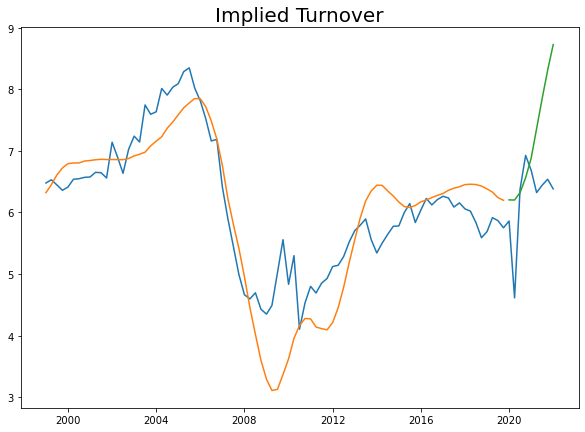

In [41]:
plt.figure(figsize=(10,7))
plt.plot(df_hpi_hcai.DATE, df_hpi_hcai.Implied_Turnover.values, label = "Implied turnover")
plt.plot(pre_covid.DATE, y_hist, label = "Fitted implied turnover")
plt.plot(covid_period.DATE, y_pred, label = "Predicted implied turnover")
#plt.legend(fontsize = 15)
plt.title("Implied Turnover", size = 20);

## **3.2 Using pre-covid period**

In [42]:
X_pre, y_pre = pre_covid[new_fea], pre_covid['Implied_Turnover']
X1_pre = sm.add_constant(X_pre)
model = sm.OLS(y_pre, X1_pre).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Implied_Turnover   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     238.3
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.17e-34
Time:                        23:54:57   Log-Likelihood:                -40.616
No. Observations:                  84   AIC:                             87.23
Df Residuals:                      81   BIC:                             94.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4721      0.115     39.028   

In [43]:
predictions = model.get_prediction(sm.add_constant(covid_period[new_fea]))
pred_df = predictions.summary_frame(alpha=0.05)

In [44]:
np.sqrt(mean_squared_error(covid_period['Implied_Turnover'], pred_df['mean']))

0.6357636322359539

In [45]:
pre_covid_fit = model.predict(sm.add_constant(X_pre))

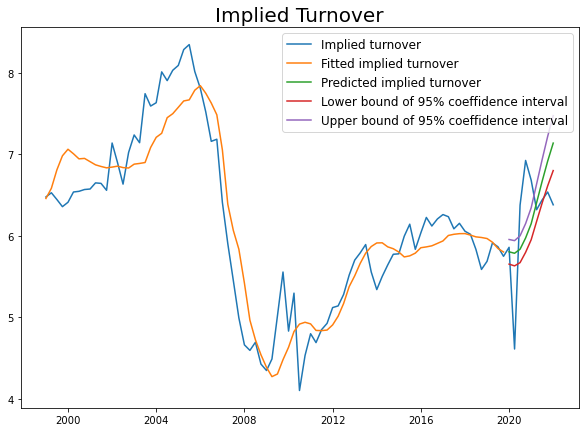

In [46]:
plt.figure(figsize=(10,7))
plt.plot(df_hpi_hcai.DATE, df_hpi_hcai.Implied_Turnover.values, label = "Implied turnover")
plt.plot(pre_covid.DATE, pre_covid_fit, label = "Fitted implied turnover")
plt.plot(covid_period.DATE, pred_df['mean'], label = "Predicted implied turnover")
plt.plot(covid_period.DATE, pred_df['mean_ci_lower'], label = "Lower bound of 95% coeffidence interval")
plt.plot(covid_period.DATE, pred_df['mean_ci_upper'], label = "Upper bound of 95% coeffidence interval")
plt.legend(fontsize = 12)
plt.title("Implied Turnover", size = 20);

Let us see how is going with time series cross validation. 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import gc

models = []
rmse = []
X, y = pre_covid[new_fea], pre_covid['Implied_Turnover']
tscv = TimeSeriesSplit(n_splits=6)
for fold, (train_index, test_index) in enumerate(tscv.split(pre_covid)):
    print(f'========================== Fold {fold} ===========================')
    train_date = pre_covid.DATE.iloc[train_index].dt.date.values
    test_date = pre_covid.DATE.iloc[test_index].dt.date.values
    print(f'Train dataset from {train_date[0]} to {train_date[-1]}')
    print(f'Test dataset from {test_date[0]} to {test_date[-1]}')
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    X1_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X1_train).fit()
    models.append(model)
    predictions = model.predict(sm.add_constant(X_test))
    print(f'Fold {fold} has RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')
    rmse.append(np.sqrt(mean_squared_error(y_test, predictions)))
    del X_train, y_train, X_test, y_test, model
    gc.collect()
print("RMSE: {}".format(np.mean(rmse)))

========================== Fold 0 ===========================
Train dataset from 1999-01-01 to 2001-10-01
Test dataset from 2002-01-01 to 2004-10-01
Fold 0 has RMSE: 0.8918784604362683
========================== Fold 1 ===========================
Train dataset from 1999-01-01 to 2004-10-01
Test dataset from 2005-01-01 to 2007-10-01
Fold 1 has RMSE: 0.5663961298589204
========================== Fold 2 ===========================
Train dataset from 1999-01-01 to 2007-10-01
Test dataset from 2008-01-01 to 2010-10-01
Fold 2 has RMSE: 2.6607673592104883
========================== Fold 3 ===========================
Train dataset from 1999-01-01 to 2010-10-01
Test dataset from 2011-01-01 to 2013-10-01
Fold 3 has RMSE: 0.22215316859638215
========================== Fold 4 ===========================
Train dataset from 1999-01-01 to 2013-10-01
Test dataset from 2014-01-01 to 2016-10-01
Fold 4 has RMSE: 0.30239154995310075
========================== Fold 5 ===========================
Train datas

In [48]:
mean = []
upper = []
lower = []
hist = []
for model in models:
    predictions = model.get_prediction(sm.add_constant(covid_period[new_fea]))
    pred_df = predictions.summary_frame(alpha=0.05)
    fit = model.get_prediction(sm.add_constant(pre_covid[new_fea]))
    fit_df = fit.summary_frame(alpha=0.05)
    mean.append(pred_df['mean'])
    lower.append(pred_df['mean_ci_lower'])
    upper.append(pred_df['mean_ci_upper'])
    hist.append(fit_df['mean'])
pred = np.mean(mean, axis=0)
lower = np.mean(lower, axis=0)
upper = np.mean(upper, axis=0)
covid_mean = np.mean(hist, axis=0)

In [49]:
np.sqrt(mean_squared_error(covid_period['Implied_Turnover'], pred))

1.2684446101848146

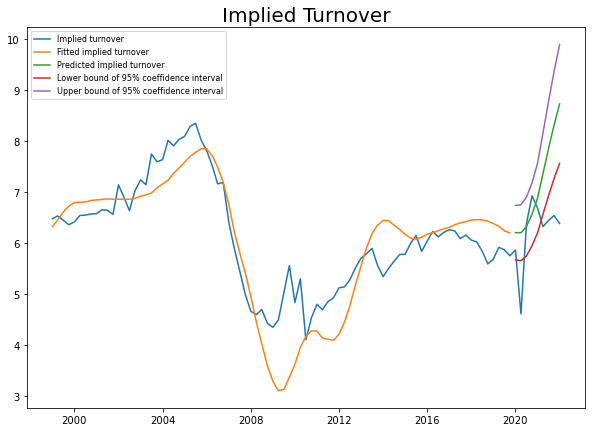

In [50]:
plt.figure(figsize=(10,7))
plt.plot(df_hpi_hcai.DATE, df_hpi_hcai.Implied_Turnover.values, label = "Implied turnover")
plt.plot(pre_covid.DATE, covid_mean, label = "Fitted implied turnover")
plt.plot(covid_period.DATE, pred, label = "Predicted implied turnover")
plt.plot(covid_period.DATE, lower, label = "Lower bound of 95% coeffidence interval")
plt.plot(covid_period.DATE, upper, label = "Upper bound of 95% coeffidence interval")
plt.legend(fontsize = 8)
plt.title("Implied Turnover", size = 20);